## 练习 3-5
创建一个模拟长号滑奏的波形，滑奏从C3(262Hz)到F3(349Hz)，然后回到C3.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa
import librosa.display
import IPython.display as ipd

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "Times New Roman"]

KeyboardInterrupt: 

In [111]:
# 参数设置
fs = 44100  # 采样率 (Hz)
duration = 2.0  # 滑奏总时长 (s)
c3_freq = 262  # C3频率 (Hz)
f3_freq = 349  # F3频率 (Hz)
t = np.linspace(0, duration, int(fs * duration), endpoint=False)

In [112]:
# 频率变化曲线（先上升到F3，再回到C3）
def frequency_trajectory(t, duration, f_start, f_end):
    """生成滑奏的频率变化曲线"""
    midpoint = duration / 2
    if t <= midpoint:
        # 从C3到F3（上升阶段）
        return f_start + (f_end - f_start) * (t / midpoint)
    else:
        # 从F3回到C3（下降阶段）
        return f_end - (f_end - f_start) * ((t - midpoint) / midpoint)

# 向量化频率计算
v_frequency = np.vectorize(frequency_trajectory)
frequencies = v_frequency(t, duration, c3_freq, f3_freq)

# 生成相位
phase = 2 * np.pi * np.cumsum(frequencies) / fs

In [113]:
# 生成锯齿波模拟长号声
trombone_wave = signal.sawtooth(phase)

# 归一化
trombone_wave = trombone_wave / np.max(np.abs(trombone_wave))

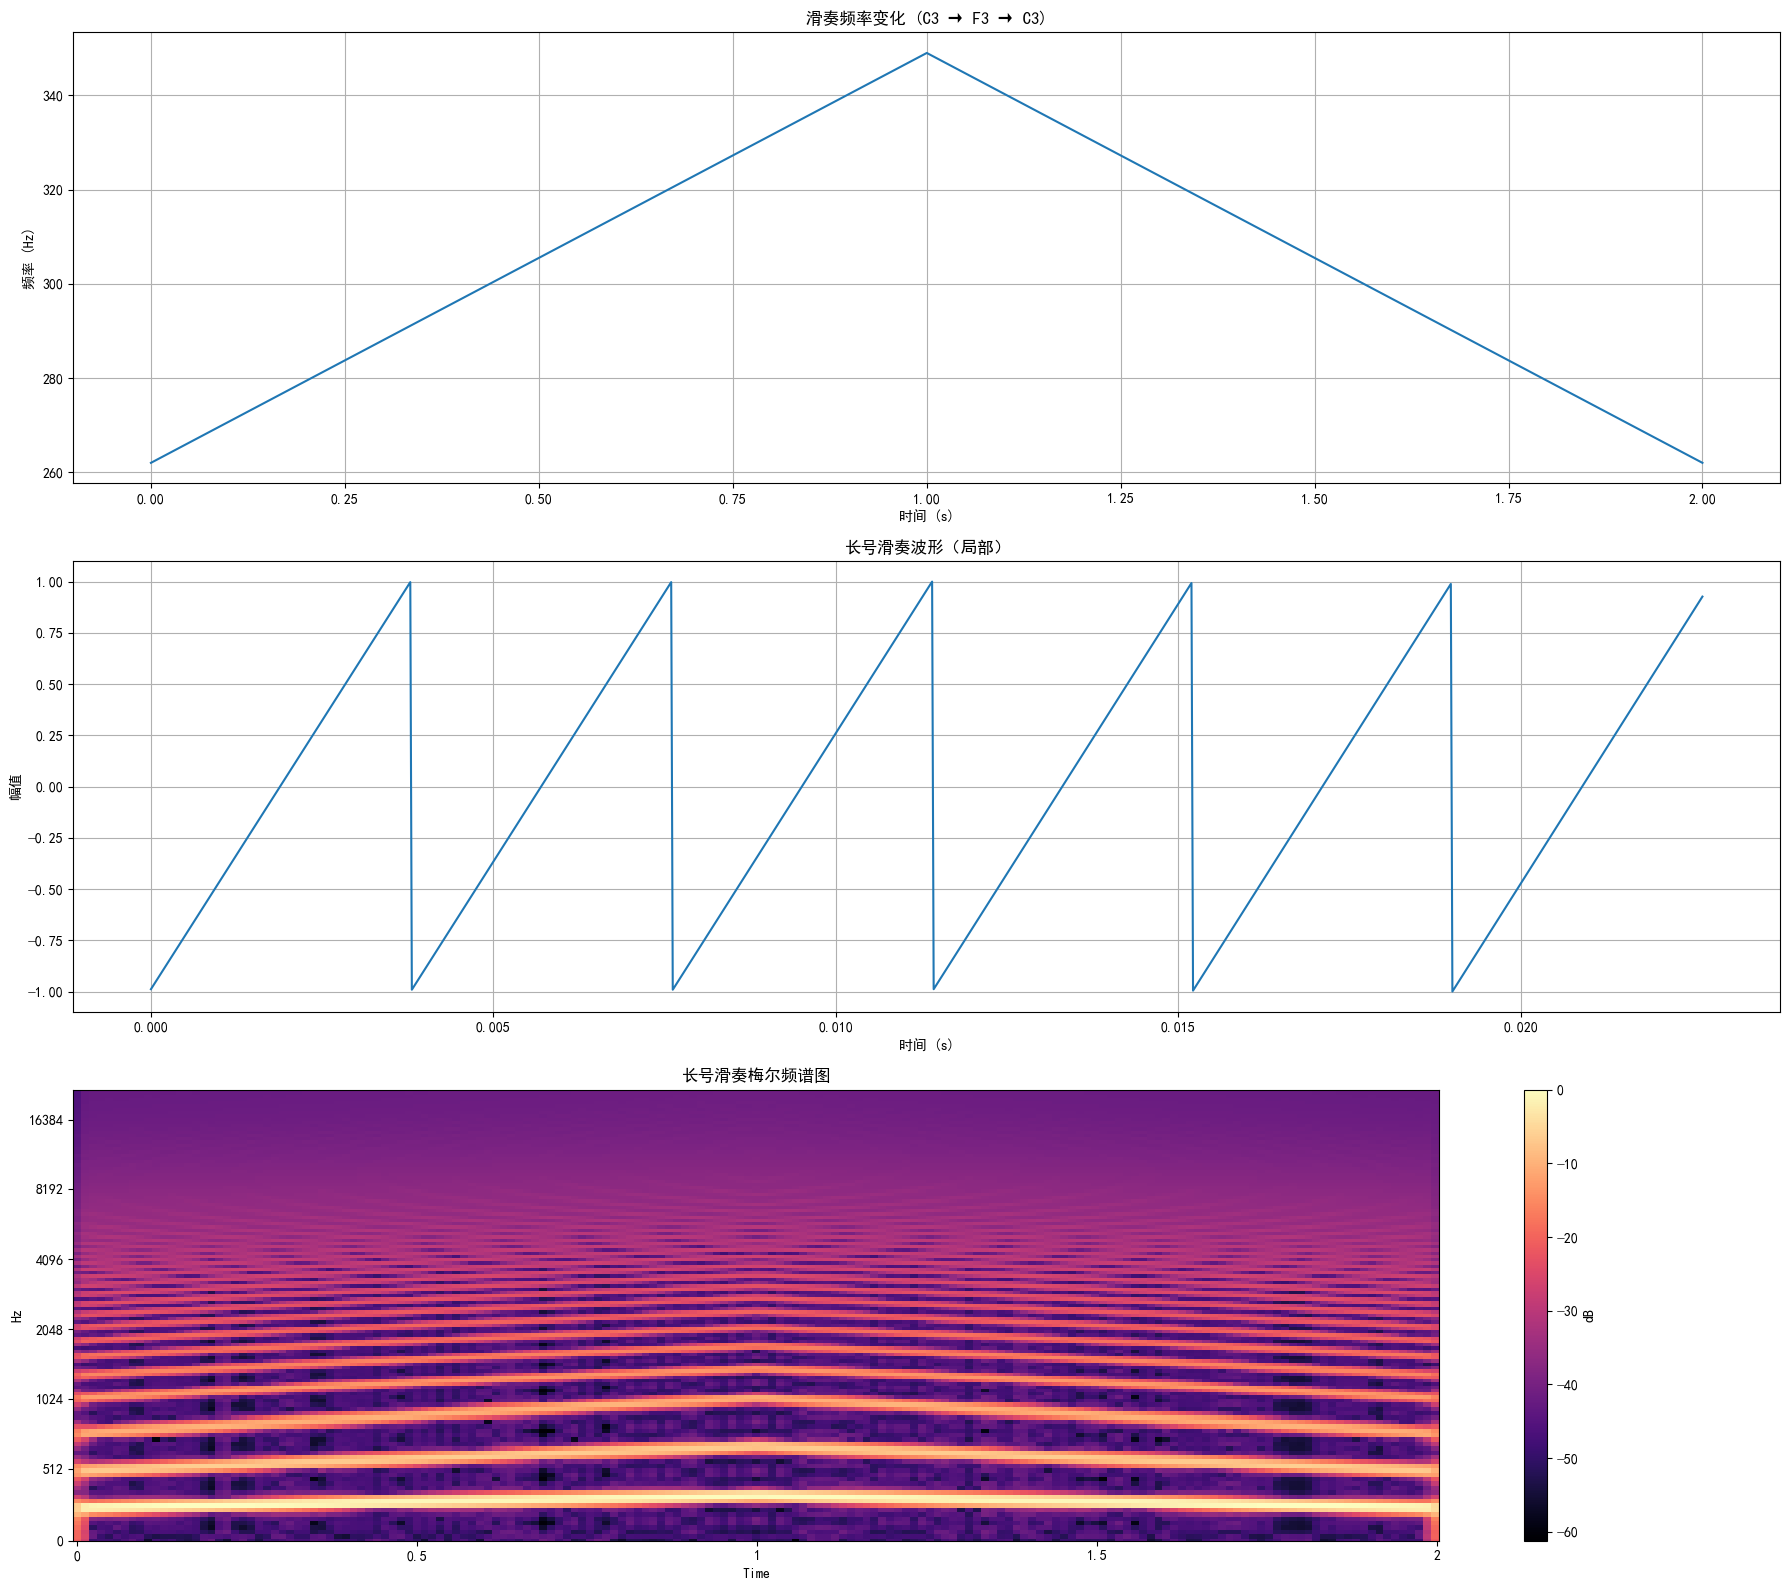

In [114]:
# 1. 绘制频率变化曲线
plt.figure(figsize=(18, 16))
plt.subplot(3, 1, 1)
plt.plot(t, frequencies)
plt.title('滑奏频率变化 (C3 → F3 → C3)')
plt.xlabel('时间 (s)')
plt.ylabel('频率 (Hz)')
plt.grid(True)

# 2. 绘制波形（前1000个样本）
plt.subplot(3, 1, 2)
plt.plot(t[:1000], trombone_wave[:1000])
plt.title('长号滑奏波形（局部）')
plt.xlabel('时间 (s)')
plt.ylabel('幅值')
plt.grid(True)

# 3. 绘制梅尔频谱图
plt.subplot(3, 1, 3)
S = librosa.feature.melspectrogram(y=trombone_wave, sr=fs, n_fft=2048, hop_length=512)
S_dB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_dB, sr=fs, x_axis='time', y_axis='mel', hop_length=512)
plt.colorbar(label='dB')
plt.ylim(0,fs/2)
plt.title('长号滑奏梅尔频谱图')
plt.tight_layout()
plt.show()

# 4. 播放音频
ipd.Audio(trombone_wave, rate=fs)

单纯用锯齿波模仿长号声，会使声音有一些干，加入一些ADSR包络以及添加随机噪声模拟铜管摩擦声，可以使声音更加真实。